In [1]:
from scipy import optimize
# import cvxopt
import matplotlib.pyplot as plt
import numpy as np
import sympy
sympy.init_printing()

In [4]:
# Unconstrained Multivariate optimization
# -Harder thanunivariateoptimization thus the approach we use is...
# --consider the gradient of the objective fuction f(x) at given point x
# --The negative of the gradient always points to the direction in which the function f(x) decreses the most
# --As minimization strategy, it is therefore sensible to move along this direction for some distance alfa(k) and then iterate this scheme at the new point
# --This methos is known as steepest gradient descent
# --Iteration formular xk+1 = xk - alfa(k)(grad(f(x)))

# -Neton's method for multivariate optimization is a modification of the steepest descent and can improve convergence
# --Iteration formular is xk+1 = xk - inv(H(f))(xk)(grad(f(xk)))
# ---H is the Hessian Matrix for the function
# ---this alters both the direction and the length of the step

# In scipy, Newton's methosis implemented using the dunction optimize.fmin_ncg
# --It takes a python function for the objective function, a starting point and optionally a python function evaluating the Hessian.

# To see how this method can be used to solve an
# optimization problem, we consider the following problem: min x f ( x ) where the
# objective function is f (x) = (x 1 − 1) 4 +5(x 2 − 1) 2 − 2x 1 x 2


In [7]:
x1, x2 = sympy.symbols("x_1, x_2")
f_sym = (x1-1)**4 + 5*(x2-1)**2 - 2*x1*x2
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]

"""
I n practice, the inverse of the Hessian does not need to be computed, and instead we can solve
the linear equation system H f (x k )y k = − ∇f(x k ) and use the integration formula x k+1 = x k +y k .
"""

'\nI n practice, the inverse of the Hessian does not need to be computed, and instead we can solve\nthe linear equation system H f (x k )y k = − ∇f(x k ) and use the integration formula x k+1 = x k +y k .\n'

In [8]:
# Gradient
sympy.Matrix(fprime_sym)

⎡                  3⎤
⎢-2⋅x₂ + 4⋅(x₁ - 1) ⎥
⎢                   ⎥
⎣-2⋅x₁ + 10⋅x₂ - 10 ⎦

In [9]:
# Hessian
fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in (x1, x2)]
sympy.Matrix(fhess_sym)

⎡           2    ⎤
⎢12⋅(x₁ - 1)   -2⎥
⎢                ⎥
⎣     -2       10⎦

In [13]:
# /Now that we have a symbolic expression of the gradient and 
# the Hessian, we can create vectorized functions for these expressinos using sympy.lambdify

f_lmbda = sympy.lambdify((x1, x2), f_sym, 'numpy')
fprime_lmbda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')
fhess_lmbda = sympy.lambdify((x1, x2), fhess_sym, 'numpy')

def func_XY_to_X_Y(f):
    """
    Wrapper for f(X) -> f(X[0], X[1])
    """
    return lambda X: np.array(f(X[0], X[1]))

f = func_XY_to_X_Y(f_lmbda)
fprime = func_XY_to_X_Y(fprime_lmbda)
fhess = func_XY_to_X_Y(fhess_lmbda)

In [15]:
# Numerical approximation of the problem using optimize

# use a starting point od 0, 0
x_opt = optimize.fmin_ncg(f, (0,0), fprime=fprime, fhess=fhess)
x_opt

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 17
         Hessian evaluations: 8


array([1.88292613, 1.37658523])

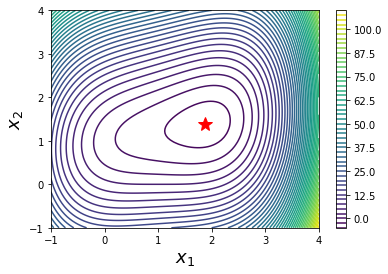

In [17]:
# the routine found a minimum point at(x1, x2) = (1.88292613, 1.37658523)
# Visualization

fig, ax = plt.subplots(figsize=(6,4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lmbda(X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)